In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

2023-10-14 00:34:27.432763: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
data2022 = pd.read_excel('../data/2022.xlsx')

# data = data2022[['Cliente','Nombre 1','Proveedor', 'EdS','Sal.mc']]

In [14]:
data2023 = pd.read_excel('../data/2023.xlsx')


In [11]:
aux = data2022.columns

for a in aux:
    print(a)

 Nº Ticket
Centro Carga
Doc.venta
Cliente
Nombre 1
Proveedor
Nombre 1.1
EdS
Albarán
Lote producto
Sal.mcia.real
Fecha Caducidad
Material
Número de material
Tick sin ped
Vehículo
CtdAlbFab
CtdPedVtas
Cantidad entrega
UM
UM.1
Entrega
F.Descarga
H.ini.Desc
H.fin.Desc
Nº Lote Bolsa
Nº Tanque
Presión CO2
Temperat.
Creado por
Creado el
Hora
Modif.por
Modif.el
HoraModif
ID doc.
IDContRep
Tipo doc.


In [17]:
selectedColumns2022 = data2022[['Cliente','Nombre 1','Proveedor', 'EdS','Sal.mcia.real','Material','Número de material','CtdAlbFab','CtdPedVtas','Cantidad entrega','F.Descarga','H.ini.Desc','H.fin.Desc']]
selectedColumns2022.head()

,Cliente,Nombre 1,Proveedor,EdS,Sal.mcia.real,Material,Número de material,CtdAlbFab,CtdPedVtas,Cantidad entrega,F.Descarga,H.ini.Desc,H.fin.Desc
0,1.221980e+05,DAVID BAR,2399.0,MAL2,26.04.2022,VI11TC,"CERVEZA VICTORIA 11,6P TANQUE CERVEZA",5200.0,1000.0,1000.0,27.04.2022,1900-01-01 11:58:00,1900-01-01 12:09:00
1,1.268600e+05,CERVECERIA ECU,2399.0,MAL2,26.04.2022,VI11TC,"CERVEZA VICTORIA 11,6P TANQUE CERVEZA",5200.0,600.0,600.0,29.04.2022,1900-01-01 09:06:00,1900-01-01 09:13:00
2,9.100422e+09,CERVECERIA BAJO DE GUIA (CAMPO DEL,2399.0,MAL2,26.04.2022,VI11TC,"CERVEZA VICTORIA 11,6P TANQUE CERVEZA",5200.0,600.0,500.0,29.04.2022,1900-01-01 07:32:00,1900-01-01 07:38:00
3,9.100429e+09,RESTAURANTE PONDOS,2399.0,MAL2,26.04.2022,VI11TC,"CERVEZA VICTORIA 11,6P TANQUE CERVEZA",5200.0,1000.0,1000.0,28.04.2022,1900-01-01 08:25:00,1900-01-01 08:35:00
4,9.100433e+09,ASADOR VERUM,2399.0,MAL2,26.04.2022,VI11TC,"CERVEZA VICTORIA 11,6P TANQUE CERVEZA",5200.0,600.0,500.0,27.04.2022,1900-01-01 10:29:00,1900-01-01 10:35:00


In [15]:
selectedColumns2023 = data2023[['Cliente','Nombre 1','Proveedor', 'EdS','Sal.mcia.real','Material','Número de material','CtdAlbFab','CtdPedVtas','Cantidad entrega','F.Descarga','H.ini.Desc','H.fin.Desc']]
selectedColumns2023.head()

,Cliente,Nombre 1,Proveedor,EdS,Sal.mcia.real,Material,Número de material,CtdAlbFab,CtdPedVtas,Cantidad entrega,F.Descarga,H.ini.Desc,H.fin.Desc
0,1.264310e+05,BAR CAN MOIX,25580.0,MLL1,15.12.2022,ED11TC13,CERVEZA ESTRELLA 13P TANQUE CERVEZA,18000.0,600.0,600.8,03.01.2023,1900-01-01 08:00:44,1900-01-01 08:20:44
1,1.266070e+05,RESTAURANTE ES TRASTO,25580.0,MLL1,15.12.2022,ED11TC13,CERVEZA ESTRELLA 13P TANQUE CERVEZA,18000.0,600.0,597.9,02.01.2023,1900-01-01 09:00:44,1900-01-01 09:20:44
2,9.100118e+09,SA COVA DETS ASES,25580.0,MLL1,15.12.2022,ED11TC13,CERVEZA ESTRELLA 13P TANQUE CERVEZA,18000.0,600.0,601.1,03.01.2023,1900-01-01 07:00:44,1900-01-01 07:20:44
3,9.100430e+09,BAR TAMBUCHO,25580.0,MLL1,15.12.2022,ED11TC13,CERVEZA ESTRELLA 13P TANQUE CERVEZA,18000.0,600.0,167.7,03.01.2023,1900-01-01 09:10:44,1900-01-01 09:20:44
4,9.100430e+09,BAR TAMBUCHO,25580.0,MLL1,15.12.2022,ED11TC13,CERVEZA ESTRELLA 13P TANQUE CERVEZA,18000.0,600.0,434.2,03.01.2023,1900-01-01 09:00:44,1900-01-01 09:10:44


In [22]:
cliente2022 = selectedColumns2022['Cliente']
cliente2022
cliente2023 = selectedColumns2023['Cliente']
cliente2023

0        1.264310e+05
1        1.266070e+05
2        9.100118e+09
3        9.100430e+09
4        9.100430e+09
             ...     
11011    1.177240e+05
11012    1.200680e+05
11013    9.100428e+09
11014             NaN
11015             NaN
Name: Cliente, Length: 11016, dtype: float64

In [23]:
nombre2022 = selectedColumns2022['Nombre 1']
nombre2022
nombre2023 = selectedColumns2023['Nombre 1']
nombre2023

0                 BAR CAN MOIX
1        RESTAURANTE ES TRASTO
2            SA COVA DETS ASES
3                 BAR TAMBUCHO
4                 BAR TAMBUCHO
                 ...          
11011             BAR LUNATTIC
11012        ROCK & GRILL CAFE
11013     RTE ASADOR EL RETIRO
11014                      NaN
11015                      NaN
Name: Nombre 1, Length: 11016, dtype: object

In [24]:
proveedor2022 = selectedColumns2022['Proveedor']
proveedor2022
proveedor2023 = selectedColumns2023['Proveedor']
proveedor2023

0        25580.0
1        25580.0
2        25580.0
3        25580.0
4        25580.0
          ...   
11011    12184.0
11012    12184.0
11013    12184.0
11014        NaN
11015        NaN
Name: Proveedor, Length: 11016, dtype: float64

In [25]:
eds2022 = selectedColumns2022['EdS']
eds2022
eds2023 = selectedColumns2023['EdS']
eds2023


0        MLL1
1        MLL1
2        MLL1
3        MLL1
4        MLL1
         ... 
11011    BCN3
11012    BCN3
11013    BCN3
11014     NaN
11015     NaN
Name: EdS, Length: 11016, dtype: object

In [26]:
salMcia2022 = selectedColumns2022['Sal.mcia.real']
salMcia2022
salMcia2023 = selectedColumns2023['Sal.mcia.real']
salMcia2023   

0        15.12.2022
1        15.12.2022
2        15.12.2022
3        15.12.2022
4        15.12.2022
            ...    
11011    04.10.2023
11012    04.10.2023
11013    04.10.2023
11014           NaN
11015           NaN
Name: Sal.mcia.real, Length: 11016, dtype: object

In [27]:
material2022 = selectedColumns2022['Material']
material2022
material2023 = selectedColumns2023['Material']
material2023

0        ED11TC13
1        ED11TC13
2        ED11TC13
3        ED11TC13
4        ED11TC13
           ...   
11011    ED11TC13
11012    ED11TC13
11013    ED11TC13
11014         NaN
11015         NaN
Name: Material, Length: 11016, dtype: object

In [28]:
ctdAlbFab2022 = selectedColumns2022['CtdAlbFab']
ctdAlbFab2022
ctdAlbFab2023 = selectedColumns2023['CtdAlbFab']
ctdAlbFab2023

0        18000.0
1        18000.0
2        18000.0
3        18000.0
4        18000.0
          ...   
11011     9120.0
11012     9120.0
11013     9120.0
11014        NaN
11015        NaN
Name: CtdAlbFab, Length: 11016, dtype: float64

In [29]:
ctdPedVtas2022 = selectedColumns2022['CtdPedVtas']
ctdPedVtas2022
ctdPedVtas2023 = selectedColumns2023['CtdPedVtas']
ctdPedVtas2023

0         600.0
1         600.0
2         600.0
3         600.0
4         600.0
          ...  
11011    1000.0
11012    1000.0
11013       1.0
11014       NaN
11015       NaN
Name: CtdPedVtas, Length: 11016, dtype: float64

In [30]:
cantEntrega2022 = selectedColumns2022['Cantidad entrega']
cantEntrega2022
cantEntrega2023 = selectedColumns2023['Cantidad entrega']
cantEntrega2023

0            600.80
1            597.90
2            601.10
3            167.70
4            434.20
            ...    
11011        990.00
11012        990.00
11013        600.00
11014           NaN
11015    7447923.89
Name: Cantidad entrega, Length: 11016, dtype: float64

In [31]:
fDescarga2022 = selectedColumns2022['F.Descarga']
fDescarga2022
fDescarga2023 = selectedColumns2023['F.Descarga']
fDescarga2023

0        03.01.2023
1        02.01.2023
2        03.01.2023
3        03.01.2023
4        03.01.2023
            ...    
11011    05.10.2023
11012    05.10.2023
11013    05.10.2023
11014           NaN
11015           NaN
Name: F.Descarga, Length: 11016, dtype: object

In [32]:
hIniDesc2022 = selectedColumns2022['H.ini.Desc']
hIniDesc2022
hIniDesc2023 = selectedColumns2023['H.ini.Desc']
hIniDesc2023

0       1900-01-01 08:00:44
1       1900-01-01 09:00:44
2       1900-01-01 07:00:44
3       1900-01-01 09:10:44
4       1900-01-01 09:00:44
                ...        
11011   1900-01-01 07:03:44
11012   1900-01-01 07:22:44
11013   1900-01-01 07:55:44
11014                   NaT
11015                   NaT
Name: H.ini.Desc, Length: 11016, dtype: datetime64[ns]

In [33]:
hFinDesc2022 = selectedColumns2022['H.fin.Desc']
hFinDesc2022
hFinDesc2023 = selectedColumns2023['H.fin.Desc']
hFinDesc2023

0       1900-01-01 08:20:44
1       1900-01-01 09:20:44
2       1900-01-01 07:20:44
3       1900-01-01 09:20:44
4       1900-01-01 09:10:44
                ...        
11011   1900-01-01 07:16:44
11012   1900-01-01 07:33:44
11013   1900-01-01 08:02:44
11014                   NaT
11015                   NaT
Name: H.fin.Desc, Length: 11016, dtype: datetime64[ns]

In [37]:
date_time2022 = pd.to_datetime(data2022['F.Descarga'], format='%d.%m.%Y')
date_time2022

0       2022-04-27
1       2022-04-29
2       2022-04-29
3       2022-04-28
4       2022-04-27
           ...    
12536   2022-04-26
12537   2022-04-26
12538   2022-04-26
12539          NaT
12540          NaT
Name: F.Descarga, Length: 12541, dtype: datetime64[ns]

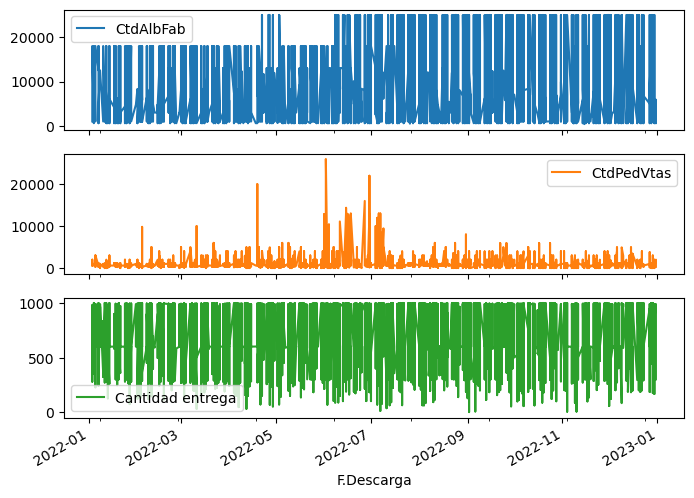

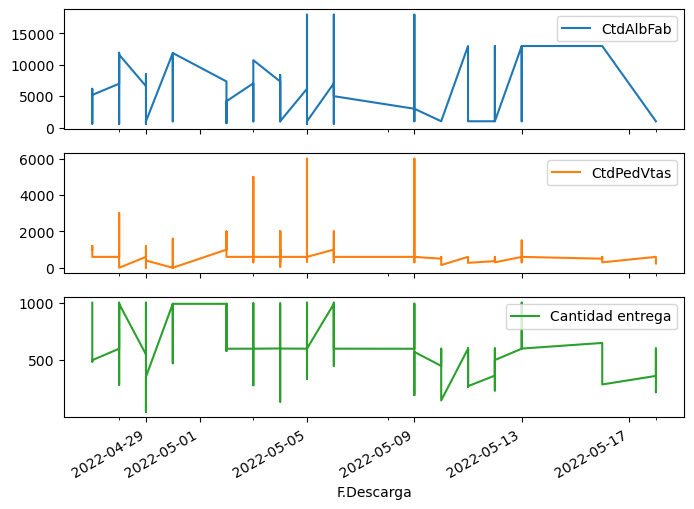

In [40]:
plot_cols2022 = ['Sal.mcia.real', 'CtdAlbFab', 'CtdPedVtas', 'Cantidad entrega']
plot_features2022 = selectedColumns2022[plot_cols2022]
plot_features2022.index = date_time2022
_ = plot_features2022.plot(subplots=True)

plot_features = selectedColumns2022[plot_cols2022][:480]
plot_features.index = date_time2022[:480]
_ = plot_features.plot(subplots=True)

